In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, f1_score, precision_score
from collections import Counter
from prettytable import PrettyTable

SEED = 4222
EPOCHS = 5


In [ ]:

suicide_detection_df = pd.read_csv('/content/drive/MyDrive/Tumblr Vietnam/Tusat2.csv', header=0)
suicide_detection_df.drop(columns=['text'], axis=1, inplace=True)
suicide_detection_df = suicide_detection_df.rename(columns={"cleaned_text": "text"})
classes = {"suicide": 1, "non-suicide": 0}
suicide_detection_df = suicide_detection_df.replace({"class": classes})
suicide_detection_df = suicide_detection_df.dropna(subset=['text'])
suicide_detection_df.head()

,class,text
0,1,sex wife threaten suicide recently leave wife ...
1,0,weird not affect compliment come know girl fee...
2,0,finally hear bad year swear fucking god annoying
3,1,need help help cry hard
4,1,lose hello adam struggle year afraid past year...


In [ ]:
train_text, test_text, train_labels, test_labels = train_test_split(suicide_detection_df['text'], suicide_detection_df['class'],
                                                                    random_state=SEED,
                                                                    test_size=0.2,
                                                                    stratify=suicide_detection_df['class'])

In [ ]:
def load_doc(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text
vocab_filename = '/content/drive/MyDrive/Tumblr Vietnam/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [ ]:
def load_embedding(filename):
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	embedding = dict()
	for line in lines:
		parts = line.split()
		embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
	return embedding

In [ ]:
def clean_line(line, vocab):
  tokens = line.split()
  tokens_clean = [w for w in tokens if w in vocab]
  return [tokens_clean]

def process_lines(data, vocab):
  lines = list()
  for i in data:
    line = clean_line(i, vocab)
    # add lines to list
    lines += line
  return lines

In [ ]:
def document_vector(doc, embeddings):
    sentence = list()
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in embeddings.keys()]
    for i in doc:
      word = embeddings[i]
      sentence.append(word)
    return np.mean(sentence, axis=0)
def all_documents(df, labels_ori, embeddings):
  vec = list()
  labels = list()
  for i in range(len(df)):
    if len(df[i]) == 0:
      continue
    else:
      vec.append(document_vector(df[i], embeddings))
      labels.append(labels_ori.values[i])
  return vec, labels

In [ ]:
word2vec = load_embedding('/content/drive/MyDrive/Tumblr Vietnam/embedding_word2vec.txt')

In [ ]:
train_clean = process_lines(train_text, vocab)
test_clean = process_lines(test_text, vocab)
train_vec, train_labels_new = all_documents(train_clean, train_labels,word2vec)
test_vec, test_labels_new = all_documents(test_clean, test_labels, word2vec)

In [ ]:
lr = LogisticRegression()
lr.fit(train_vec, train_labels_new)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train_pred = lr.predict(train_vec)
print('Training set accuracy %s' % accuracy_score(train_labels_new, y_train_pred))
print(classification_report(train_labels_new, y_train_pred))

Training set accuracy 0.9081565004608345
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     92732
           1       0.89      0.93      0.91     92801

    accuracy                           0.91    185533
   macro avg       0.91      0.91      0.91    185533
weighted avg       0.91      0.91      0.91    185533



In [ ]:
y_test_pred = lr.predict(test_vec)
print('Test set accuracy %s' % accuracy_score(test_labels_new, y_test_pred))
print(classification_report(test_labels_new, y_test_pred))

Test set accuracy 0.9071407011340606
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     23182
           1       0.89      0.93      0.91     23200

    accuracy                           0.91     46382
   macro avg       0.91      0.91      0.91     46382
weighted avg       0.91      0.91      0.91     46382



In [ ]:
word2vec_test_accuracy_score = accuracy_score(test_labels_new, y_test_pred)
word2vec_test_precision_score = precision_score(test_labels_new, y_test_pred)
word2vec_test_recall_score = recall_score(test_labels_new, y_test_pred)
word2vec_test_f1_score = f1_score(test_labels_new, y_test_pred)

In [ ]:
raw_embedding_glove = load_embedding('/content/drive/MyDrive/Tumblr Vietnam/glove.twitter.27B.200d.txt')

In [ ]:
train_clean_glove = process_lines(train_text, raw_embedding_glove.keys())
test_clean_glove = process_lines(test_text, raw_embedding_glove.keys())
train_vec_glove, train_labels_glove_new = all_documents(train_clean_glove, train_labels, raw_embedding_glove)
test_vec_glove, test_labels_glove_new = all_documents(test_clean_glove, test_labels, raw_embedding_glove)

In [ ]:
lr = LogisticRegression()
lr.fit(train_vec_glove, train_labels_glove_new)
y_train_pred = lr.predict(train_vec_glove)
print('Training set accuracy %s' % accuracy_score(train_labels_glove_new, y_train_pred))
print(classification_report(train_labels_glove_new, y_train_pred))

y_test_pred = lr.predict(test_vec_glove)
print('Training set accuracy %s' % accuracy_score(test_labels_glove_new, y_test_pred))
print(classification_report(test_labels_glove_new, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set accuracy 0.878189335906545
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     92708
           1       0.86      0.90      0.88     92793

    accuracy                           0.88    185501
   macro avg       0.88      0.88      0.88    185501
weighted avg       0.88      0.88      0.88    185501

Training set accuracy 0.8772315653298836
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     23180
           1       0.86      0.90      0.88     23200

    accuracy                           0.88     46380
   macro avg       0.88      0.88      0.88     46380
weighted avg       0.88      0.88      0.88     46380



In [ ]:
glove_test_accuracy_score = accuracy_score(test_labels_glove_new, y_test_pred)
glove_test_precision_score = precision_score(test_labels_glove_new, y_test_pred)
glove_test_recall_score = recall_score(test_labels_glove_new, y_test_pred)
glove_test_f1_score = f1_score(test_labels_glove_new, y_test_pred)

In [ ]:
import pandas as pd
data = {
    'Model': ['Word2Vec', 'GloVe'],
    'Accuracy': [word2vec_test_accuracy_score, glove_test_accuracy_score],
    'Precision': [word2vec_test_precision_score, glove_test_precision_score],
    'Recall': [word2vec_test_recall_score, glove_test_recall_score],
    'F1 Score': [word2vec_test_f1_score, glove_test_f1_score]
}

df = pd.DataFrame(data)

df


,Model,Accuracy,Precision,Recall,F1 Score
0,Word2Vec,0.907141,0.893064,0.925129,0.908814
1,GloVe,0.877232,0.857586,0.904828,0.880574


In [ ]:

import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, f1_score, precision_score
from sklearn.utils.class_weight import compute_class_weight

from torch.utils.data import Dataset, TensorDataset, DataLoader, RandomSampler, SequentialSampler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
%matplotlib inline

from prettytable import PrettyTable

In [ ]:
device = torch.device("cuda")
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 1e-5
SEED = 4222

In [ ]:
suicide_detection_df = pd.read_csv('/content/drive/MyDrive/Tumblr Vietnam/Tusat2.csv', header=0)
suicide_detection_df.drop(columns=['text'], axis=1, inplace=True)
suicide_detection_df = suicide_detection_df.rename(columns={"cleaned_text": "text"})
classes = {"suicide": 1, "non-suicide": 0}
suicide_detection_df = suicide_detection_df.replace({"class": classes})
suicide_detection_df = suicide_detection_df.dropna(subset=['text'])
suicide_detection_df.head()

,class,text
0,1,sex wife threaten suicide recently leave wife ...
1,0,weird not affect compliment come know girl fee...
2,0,finally hear bad year swear fucking god annoying
3,1,need help help cry hard
4,1,lose hello adam struggle year afraid past year...


In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(suicide_detection_df['text'], suicide_detection_df['class'],
                                                                    random_state=SEED,
                                                                    test_size=0.2,
                                                                    stratify=suicide_detection_df['class'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=SEED,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

In [ ]:
max_length = max([len(s.split()) for s in train_text])
max_length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_text)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:

def tokenize_and_encode(text, max_length=62):
    """Tokenize and encode sequences."""
    encoded_docs = tokenizer.texts_to_sequences(text)
    padded_sequence = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

    return padded_sequence
tokens_train = tokenize_and_encode(train_text)
tokens_val = tokenize_and_encode(val_text)
tokens_test = tokenize_and_encode(test_text)
train_data = TensorDataset(torch.from_numpy(tokens_train), torch.from_numpy(train_labels.to_numpy()))
val_data = TensorDataset(torch.from_numpy(tokens_val), torch.from_numpy(val_labels.to_numpy()))

train_sampler = RandomSampler(train_data)
val_sampler = SequentialSampler(val_data)

train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=BATCH_SIZE)

In [ ]:
def load_embedding(filename):
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	embedding = dict()
	for line in lines:
		parts = line.split()
		embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
	return embedding

def get_weight_matrix(embedding, vocab, embedding_dim):
	vocab_size = len(vocab) + 1
	weight_matrix = np.zeros((vocab_size, embedding_dim))
	for word, i in vocab.items():
		weight_matrix[i] = embedding.get(word)

	return weight_matrix

def create_emb_layer(weights_matrix, non_trainable=False):
    num_embeddings, embedding_dim = weights_matrix.shape[0], weights_matrix.shape[1]
    emb_layer = nn.Embedding(num_embeddings, embedding_dim)
    emb_layer.load_state_dict({'weight': torch.from_numpy(weights_matrix)})
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer, num_embeddings, embedding_dim
raw_embedding_word2vec = load_embedding('/content/drive/MyDrive/Tumblr Vietnam/embedding_word2vec.txt')
embedding_vectors_word2vec = get_weight_matrix(raw_embedding_word2vec, tokenizer.word_index, 300)
embedding_vectors_word2vec = np.float32(embedding_vectors_word2vec)

raw_embedding_glove = load_embedding('/content/drive/MyDrive/Tumblr Vietnam/glove.twitter.27B.200d.txt')

embedding_vectors_glove = get_weight_matrix(raw_embedding_glove, tokenizer.word_index, 200)
embedding_vectors_glove = np.float32(embedding_vectors_glove)

for arr in embedding_vectors_glove:
    for idx, i in enumerate(arr):
        if np.isnan(arr[idx]):
            arr[idx] = 0

In [ ]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim,
                 n_filters, filter_sizes, output_dim,
                 dropout_rate, pre_trained=False, embedding_vectors=None):

        super().__init__()

        if pre_trained:
            self.embedding, num_embeddings, embedding_dim = create_emb_layer(embedding_vectors, True)
        else:
            self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.convs = nn.ModuleList([
                                    nn.Conv1d(in_channels = embedding_dim,
                                              out_channels = n_filters,
                                              kernel_size = fs)
                                    for fs in filter_sizes
                                    ])

        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)

        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, text):

        embedded = self.embedding(text)

        embedded = embedded.permute(0, 2, 1)

        conved = [F.relu(conv(embedded)) for conv in self.convs]

        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]

        cat = self.dropout(torch.cat(pooled, dim = 1))

        return self.fc(cat)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
embedding_dim = 300
n_filters = 32
filter_sizes = [5,6,7,8]
output_dim = 1
dropout_rate = 0.2

In [ ]:
criterion = nn.BCEWithLogitsLoss()
criterion = criterion.to(device)

In [ ]:
model1 = CNN(vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout_rate, pre_trained=False)

print("No pre trained embedding weights")
print(model1)
print(f'Model 1 has {count_parameters(model1):,} trainable parameters')

No pre trained embedding weights
CNN(
  (embedding): Embedding(37790, 300)
  (convs): ModuleList(
    (0): Conv1d(300, 32, kernel_size=(5,), stride=(1,))
    (1): Conv1d(300, 32, kernel_size=(6,), stride=(1,))
    (2): Conv1d(300, 32, kernel_size=(7,), stride=(1,))
    (3): Conv1d(300, 32, kernel_size=(8,), stride=(1,))
  )
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Model 1 has 11,586,857 trainable parameters


In [ ]:
model2 = CNN(vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout_rate,
             pre_trained=True, embedding_vectors=embedding_vectors_word2vec)
model2.embedding.weight.data.copy_(torch.from_numpy(embedding_vectors_word2vec))

print("With Word2Vec pre trained embedding weights")
print(model2)
print(f'Model 2 has {count_parameters(model2):,} trainable parameters')

With Word2Vec pre trained embedding weights
CNN(
  (embedding): Embedding(37790, 300)
  (convs): ModuleList(
    (0): Conv1d(300, 32, kernel_size=(5,), stride=(1,))
    (1): Conv1d(300, 32, kernel_size=(6,), stride=(1,))
    (2): Conv1d(300, 32, kernel_size=(7,), stride=(1,))
    (3): Conv1d(300, 32, kernel_size=(8,), stride=(1,))
  )
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Model 2 has 249,857 trainable parameters


In [ ]:
model3 = CNN(vocab_size, 200, n_filters, filter_sizes, output_dim, dropout_rate,
             pre_trained=True, embedding_vectors=embedding_vectors_glove)
model3.embedding.weight.data.copy_(torch.from_numpy(embedding_vectors_glove))

print("With gloVe pre trained embedding weights")
print(model3)
print(f'Model 3 has {count_parameters(model3):,} trainable parameters')

With gloVe pre trained embedding weights
CNN(
  (embedding): Embedding(37790, 200)
  (convs): ModuleList(
    (0): Conv1d(200, 32, kernel_size=(5,), stride=(1,))
    (1): Conv1d(200, 32, kernel_size=(6,), stride=(1,))
    (2): Conv1d(200, 32, kernel_size=(7,), stride=(1,))
    (3): Conv1d(200, 32, kernel_size=(8,), stride=(1,))
  )
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Model 3 has 166,657 trainable parameters


In [ ]:

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division
    acc = correct.sum()/len(correct)
    return acc
def train():

    model.train()

    total_loss, total_accuracy = 0, 0

    total_preds = []

    for step, batch in enumerate(train_dataloader):

        if step % 50 == 0 and not step == 0:
            print('Batch {:>5,} of {:>5,}.'.format(step, len(train_dataloader)))

        inputs, labels = batch
        inputs = inputs.type(torch.LongTensor)

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        model.zero_grad()

        preds = model(inputs).squeeze(1)
]
        loss = criterion(preds.squeeze(), labels.float())

        total_loss += loss.item()

        loss.backward()

        acc = binary_accuracy(preds, labels)

        total_accuracy += acc.item()

        optimizer.step()

        preds = preds.detach().cpu().numpy()

        total_preds.append(preds)

    avg_loss = total_loss / len(train_dataloader)

    avg_acc = total_accuracy / len(train_dataloader)

    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, avg_acc, total_preds

def evaluate():

    print("\nEvaluating...")

    model.eval()

    total_loss, total_accuracy = 0, 0

    total_preds = []

    for step, batch in enumerate(val_dataloader):

        if step % 50 == 0 and not step == 0:
            print('Batch {:>5,} of {:>5,}.'.format(step, len(val_dataloader)))

        inputs, labels = batch
        inputs = inputs.type(torch.LongTensor)

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        with torch.no_grad():

            preds = model(inputs).squeeze(1)

            loss = criterion(preds.squeeze(), labels.float())

            total_loss += loss.item()

            acc = binary_accuracy(preds, labels)

            total_accuracy += acc.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    avg_loss = total_loss / len(val_dataloader)

    avg_acc = total_accuracy / len(val_dataloader)

    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, avg_acc, total_preds



In [ ]:
torch.cuda.is_available()

True

In [ ]:
optimizer = optim.Adam(model1.parameters(), lr=LEARNING_RATE)
model = model1.to(device)
MODEL_WEIGHTS_PATH = '/content/drive/MyDrive/Tumblr Vietnam/cnn_model_1_saved_weights.pt'

In [ ]:
best_valid_loss = float('inf')

model1_train_losses = []
model1_valid_losses = []

model1_train_accuracies = []
model1_valid_accuracies = []

train_on_gpu = True

for epoch in range(EPOCHS):

    print('\n Epoch {:} / {:}'.format(epoch+1, EPOCHS))

    # train model
    train_loss, train_acc, _ = train()

    # evaluate model
    valid_loss, valid_acc, _ = evaluate()

    # save best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_WEIGHTS_PATH)

    # append training and validation loss
    model1_train_losses.append(train_loss)
    model1_valid_losses.append(valid_loss)

    # append training and validation acc
    model1_train_accuracies.append(train_acc)
    model1_valid_accuracies.append(valid_acc)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

    print(f'\nTraining Accuracy: {train_acc:.3f}')
    print(f'Validation Accuracy: {valid_acc:.3f}')



 Epoch 1 / 5
Batch    50 of 5,799.
Batch   100 of 5,799.
Batch   150 of 5,799.
Batch   200 of 5,799.
Batch   250 of 5,799.
Batch   300 of 5,799.
Batch   350 of 5,799.
Batch   400 of 5,799.
Batch   450 of 5,799.
Batch   500 of 5,799.
Batch   550 of 5,799.
Batch   600 of 5,799.
Batch   650 of 5,799.
Batch   700 of 5,799.
Batch   750 of 5,799.
Batch   800 of 5,799.
Batch   850 of 5,799.
Batch   900 of 5,799.
Batch   950 of 5,799.
Batch 1,000 of 5,799.
Batch 1,050 of 5,799.
Batch 1,100 of 5,799.
Batch 1,150 of 5,799.
Batch 1,200 of 5,799.
Batch 1,250 of 5,799.
Batch 1,300 of 5,799.
Batch 1,350 of 5,799.
Batch 1,400 of 5,799.
Batch 1,450 of 5,799.
Batch 1,500 of 5,799.
Batch 1,550 of 5,799.
Batch 1,600 of 5,799.
Batch 1,650 of 5,799.
Batch 1,700 of 5,799.
Batch 1,750 of 5,799.
Batch 1,800 of 5,799.
Batch 1,850 of 5,799.
Batch 1,900 of 5,799.
Batch 1,950 of 5,799.
Batch 2,000 of 5,799.
Batch 2,050 of 5,799.
Batch 2,100 of 5,799.
Batch 2,150 of 5,799.
Batch 2,200 of 5,799.
Batch 2,250 of 5,7

In [ ]:
model.load_state_dict(torch.load(MODEL_WEIGHTS_PATH))

<All keys matched successfully>

In [ ]:
test_data = TensorDataset(torch.from_numpy(tokens_test), torch.from_numpy(test_labels.to_numpy()))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)

In [ ]:
total_preds = []

for step, batch in enumerate(test_dataloader):

    if step % 50 == 0 and not step == 0:
        print('Batch {:>5,} of {:>5,}.'.format(step, len(test_dataloader)))

    inputs, labels = batch
    inputs = inputs.type(torch.LongTensor)

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    with torch.no_grad():

        preds = model(inputs).squeeze(1)

        preds = torch.round(torch.sigmoid(preds.squeeze()))

        preds = preds.detach().cpu().numpy()

        total_preds.append(preds)

total_preds = np.concatenate(total_preds, axis=0)

Batch    50 of   725.
Batch   100 of   725.
Batch   150 of   725.
Batch   200 of   725.
Batch   250 of   725.
Batch   300 of   725.
Batch   350 of   725.
Batch   400 of   725.
Batch   450 of   725.
Batch   500 of   725.
Batch   550 of   725.
Batch   600 of   725.
Batch   650 of   725.
Batch   700 of   725.


In [ ]:
print(classification_report(test_labels, total_preds, digits=4))

              precision    recall  f1-score   support

           0     0.8959    0.9006    0.8983     11593
           1     0.9002    0.8954    0.8978     11600

    accuracy                         0.8980     23193
   macro avg     0.8980    0.8980    0.8980     23193
weighted avg     0.8980    0.8980    0.8980     23193



In [ ]:
model_1_test_accuracy_score = accuracy_score(test_labels, total_preds)
model_1_test_precision_score = precision_score(test_labels, total_preds)
model_1_test_recall_score = recall_score(test_labels, total_preds)
model_1_test_f1_score = f1_score(test_labels, total_preds)


In [ ]:
optimizer = optim.Adam(model2.parameters(), lr=LEARNING_RATE)

model = model2.to(device)

MODEL_WEIGHTS_PATH = '/content/drive/MyDrive/Tumblr Vietnam/cnn_model_2_saved_weights.pt'

In [ ]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
model2_train_losses = []
model2_valid_losses = []

# empty lists to store training and validation acc of each epoch
model2_train_accuracies = []
model2_valid_accuracies = []

train_on_gpu = True

# for each epoch
for epoch in range(EPOCHS):

    print('\n Epoch {:} / {:}'.format(epoch+1, EPOCHS))

    # train model
    train_loss, train_acc, _ = train()

    # evaluate model
    valid_loss, valid_acc, _ = evaluate()

    # save best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_WEIGHTS_PATH)

    # append training and validation loss
    model2_train_losses.append(train_loss)
    model2_valid_losses.append(valid_loss)

    # append training and validation acc
    model2_train_accuracies.append(train_acc)
    model2_valid_accuracies.append(valid_acc)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

    print(f'\nTraining Accuracy: {train_acc:.3f}')
    print(f'Validation Accuracy: {valid_acc:.3f}')


 Epoch 1 / 5
Batch    50 of 5,799.
Batch   100 of 5,799.
Batch   150 of 5,799.
Batch   200 of 5,799.
Batch   250 of 5,799.
Batch   300 of 5,799.
Batch   350 of 5,799.
Batch   400 of 5,799.
Batch   450 of 5,799.
Batch   500 of 5,799.
Batch   550 of 5,799.
Batch   600 of 5,799.
Batch   650 of 5,799.
Batch   700 of 5,799.
Batch   750 of 5,799.
Batch   800 of 5,799.
Batch   850 of 5,799.
Batch   900 of 5,799.
Batch   950 of 5,799.
Batch 1,000 of 5,799.
Batch 1,050 of 5,799.
Batch 1,100 of 5,799.
Batch 1,150 of 5,799.
Batch 1,200 of 5,799.
Batch 1,250 of 5,799.
Batch 1,300 of 5,799.
Batch 1,350 of 5,799.
Batch 1,400 of 5,799.
Batch 1,450 of 5,799.
Batch 1,500 of 5,799.
Batch 1,550 of 5,799.
Batch 1,600 of 5,799.
Batch 1,650 of 5,799.
Batch 1,700 of 5,799.
Batch 1,750 of 5,799.
Batch 1,800 of 5,799.
Batch 1,850 of 5,799.
Batch 1,900 of 5,799.
Batch 1,950 of 5,799.
Batch 2,000 of 5,799.
Batch 2,050 of 5,799.
Batch 2,100 of 5,799.
Batch 2,150 of 5,799.
Batch 2,200 of 5,799.
Batch 2,250 of 5,7

In [ ]:

# load weights of best model cnn
model.load_state_dict(torch.load(MODEL_WEIGHTS_PATH))

<All keys matched successfully>

In [ ]:

# create Tensor datasets
test_data = TensorDataset(torch.from_numpy(tokens_test), torch.from_numpy(test_labels.to_numpy()))

# Sampler for sampling the data
test_sampler = SequentialSampler(test_data)

# DataLoader
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)

In [ ]:
total_preds = []

# iterate over batches
for step, batch in enumerate(test_dataloader):

    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
        print('Batch {:>5,} of {:>5,}.'.format(step, len(test_dataloader)))

    # push the batch to gpu
    # batch = [t.to(device) for t in batch]

    inputs, labels = batch
    inputs = inputs.type(torch.LongTensor)

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # deactivate autograd
    with torch.no_grad():

        # model predictions
        preds = model(inputs).squeeze(1)

        # convert output probabilities to predicted class (0 or 1)
        preds = torch.round(torch.sigmoid(preds.squeeze()))  # rounds to the nearest integer

        preds = preds.detach().cpu().numpy()

        total_preds.append(preds)

# reshape the predictions in form of (number of samples, no. of classes)
total_preds = np.concatenate(total_preds, axis=0)

Batch    50 of   725.
Batch   100 of   725.
Batch   150 of   725.
Batch   200 of   725.
Batch   250 of   725.
Batch   300 of   725.
Batch   350 of   725.
Batch   400 of   725.
Batch   450 of   725.
Batch   500 of   725.
Batch   550 of   725.
Batch   600 of   725.
Batch   650 of   725.
Batch   700 of   725.


In [ ]:

print(classification_report(test_labels, total_preds, digits=4))

model_2_test_accuracy_score = accuracy_score(test_labels, total_preds)
model_2_test_precision_score = precision_score(test_labels, total_preds)
model_2_test_recall_score = recall_score(test_labels, total_preds)
model_2_test_f1_score = f1_score(test_labels, total_preds)


              precision    recall  f1-score   support

           0     0.9244    0.9139    0.9191     11593
           1     0.9149    0.9253    0.9201     11600

    accuracy                         0.9196     23193
   macro avg     0.9196    0.9196    0.9196     23193
weighted avg     0.9196    0.9196    0.9196     23193



In [ ]:

# define the optimizer
optimizer = optim.Adam(model3.parameters(), lr=LEARNING_RATE)

# push to GPU
model = model3.to(device)

MODEL_WEIGHTS_PATH = '/content/drive/MyDrive/Tumblr Vietnam/cnn_model_3_saved_weights.pt'

In [ ]:
best_valid_loss = float('inf')

model3_train_losses = []
model3_valid_losses = []

model3_train_accuracies = []
model3_valid_accuracies = []

train_on_gpu = True

for epoch in range(EPOCHS):

    print('\n Epoch {:} / {:}'.format(epoch+1, EPOCHS))

    train_loss, train_acc, _ = train()

    valid_loss, valid_acc, _ = evaluate()

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_WEIGHTS_PATH)

    model3_train_losses.append(train_loss)
    model3_valid_losses.append(valid_loss)

    model3_train_accuracies.append(train_acc)
    model3_valid_accuracies.append(valid_acc)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

    print(f'\nTraining Accuracy: {train_acc:.3f}')
    print(f'Validation Accuracy: {valid_acc:.3f}')



 Epoch 1 / 5
Batch    50 of 5,799.
Batch   100 of 5,799.
Batch   150 of 5,799.
Batch   200 of 5,799.
Batch   250 of 5,799.
Batch   300 of 5,799.
Batch   350 of 5,799.
Batch   400 of 5,799.
Batch   450 of 5,799.
Batch   500 of 5,799.
Batch   550 of 5,799.
Batch   600 of 5,799.
Batch   650 of 5,799.
Batch   700 of 5,799.
Batch   750 of 5,799.
Batch   800 of 5,799.
Batch   850 of 5,799.
Batch   900 of 5,799.
Batch   950 of 5,799.
Batch 1,000 of 5,799.
Batch 1,050 of 5,799.
Batch 1,100 of 5,799.
Batch 1,150 of 5,799.
Batch 1,200 of 5,799.
Batch 1,250 of 5,799.
Batch 1,300 of 5,799.
Batch 1,350 of 5,799.
Batch 1,400 of 5,799.
Batch 1,450 of 5,799.
Batch 1,500 of 5,799.
Batch 1,550 of 5,799.
Batch 1,600 of 5,799.
Batch 1,650 of 5,799.
Batch 1,700 of 5,799.
Batch 1,750 of 5,799.
Batch 1,800 of 5,799.
Batch 1,850 of 5,799.
Batch 1,900 of 5,799.
Batch 1,950 of 5,799.
Batch 2,000 of 5,799.
Batch 2,050 of 5,799.
Batch 2,100 of 5,799.
Batch 2,150 of 5,799.
Batch 2,200 of 5,799.
Batch 2,250 of 5,7

In [ ]:

model.load_state_dict(torch.load(MODEL_WEIGHTS_PATH))

<All keys matched successfully>

In [ ]:
test_data = TensorDataset(torch.from_numpy(tokens_test), torch.from_numpy(test_labels.to_numpy()))

test_sampler = SequentialSampler(test_data)

test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)

In [ ]:
total_preds = []

for step, batch in enumerate(test_dataloader):

    if step % 50 == 0 and step != 0:
        print('Batch {:>5,} of {:>5,}.'.format(step, len(test_dataloader)))

    inputs, labels = batch
    inputs = inputs.type(torch.LongTensor)

    if train_on_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()

    with torch.no_grad():

        preds = model(inputs).squeeze(1)

        preds = torch.round(torch.sigmoid(preds.squeeze()))

        preds = preds.detach().cpu().numpy()

        total_preds.append(preds)

total_preds = np.concatenate(total_preds, axis=0)


Batch    50 of   725.
Batch   100 of   725.
Batch   150 of   725.
Batch   200 of   725.
Batch   250 of   725.
Batch   300 of   725.
Batch   350 of   725.
Batch   400 of   725.
Batch   450 of   725.
Batch   500 of   725.
Batch   550 of   725.
Batch   600 of   725.
Batch   650 of   725.
Batch   700 of   725.


In [ ]:
print(classification_report(test_labels, total_preds, digits=4))

              precision    recall  f1-score   support

           0     0.9000    0.9018    0.9009     11593
           1     0.9016    0.8999    0.9008     11600

    accuracy                         0.9008     23193
   macro avg     0.9008    0.9008    0.9008     23193
weighted avg     0.9008    0.9008    0.9008     23193



In [ ]:

model_3_test_accuracy_score = accuracy_score(test_labels, total_preds)
model_3_test_precision_score = precision_score(test_labels, total_preds)
model_3_test_recall_score = recall_score(test_labels, total_preds)
model_3_test_f1_score = f1_score(test_labels, total_preds)

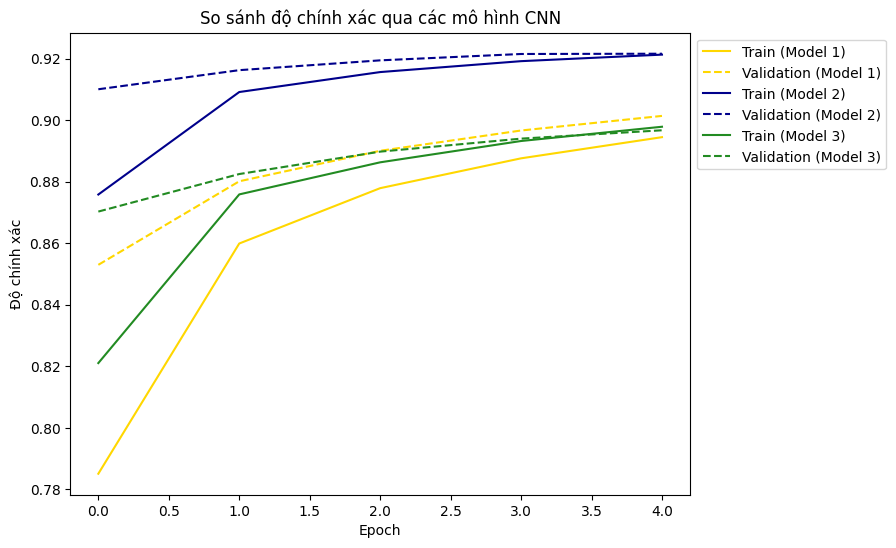

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(model1_train_accuracies, color='gold', linestyle='-')
plt.plot(model1_valid_accuracies, color='gold', linestyle='--')

plt.plot(model2_train_accuracies, color='darkblue', linestyle='-')
plt.plot(model2_valid_accuracies, color='darkblue', linestyle='--')

plt.plot(model3_train_accuracies, color='forestgreen', linestyle='-')
plt.plot(model3_valid_accuracies, color='forestgreen', linestyle='--')

plt.title('So sánh độ chính xác qua các mô hình CNN')
plt.ylabel('Độ chính xác')
plt.xlabel('Epoch')

plt.legend(['Train (Model 1)', 'Validation (Model 1)',
            'Train (Model 2)', 'Validation (Model 2)',
            'Train (Model 3)', 'Validation (Model 3)'],
           bbox_to_anchor=(1, 1))

plt.show()
